# Task 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score
data=pd.read_csv('/content/mushroom.csv')

# 2. Fundamental Data Exploration:

In [2]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [3]:
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
data.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


In [7]:
data.shape

(2000, 25)

In [8]:
data.duplicated().sum()

1024

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

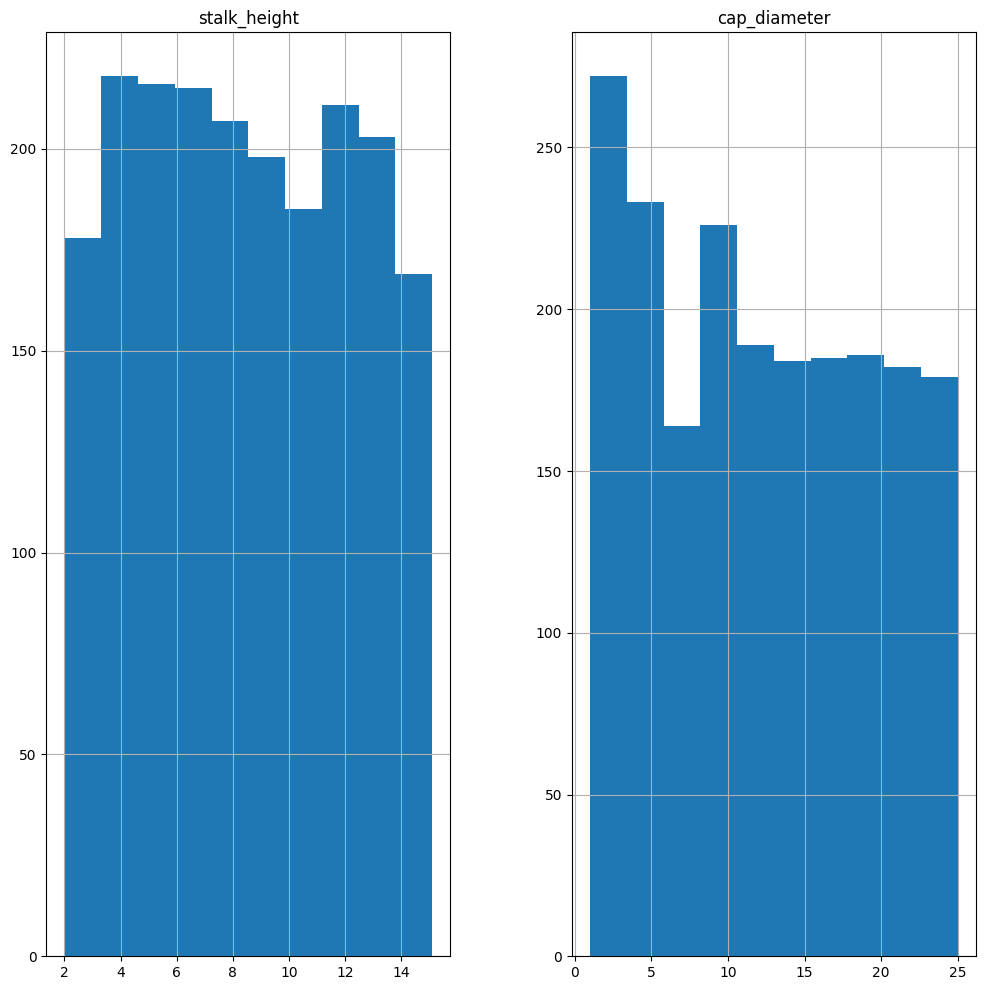

In [10]:
data.hist(figsize=(12, 12))
plt.show()

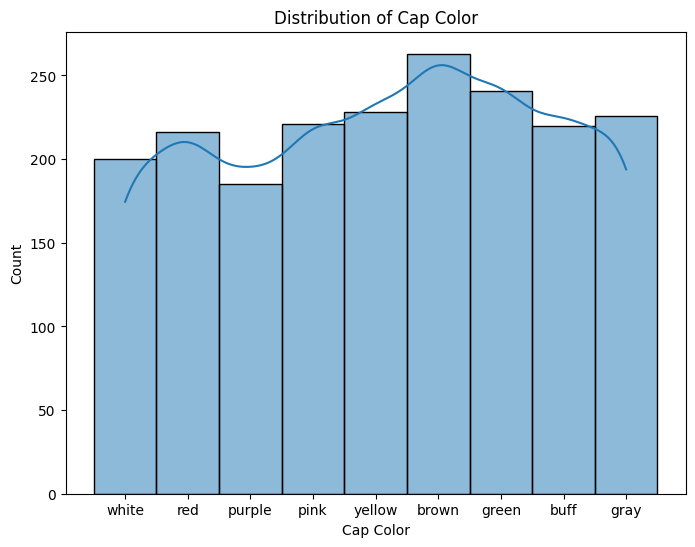

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data['cap_color'], bins=10, kde=True)
plt.title('Distribution of Cap Color')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.show()

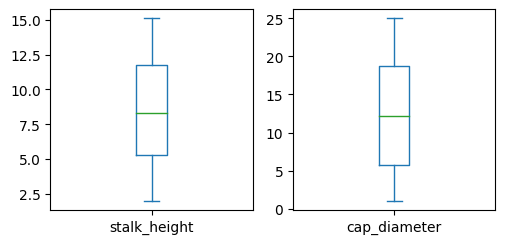

In [12]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,12))
plt.show()

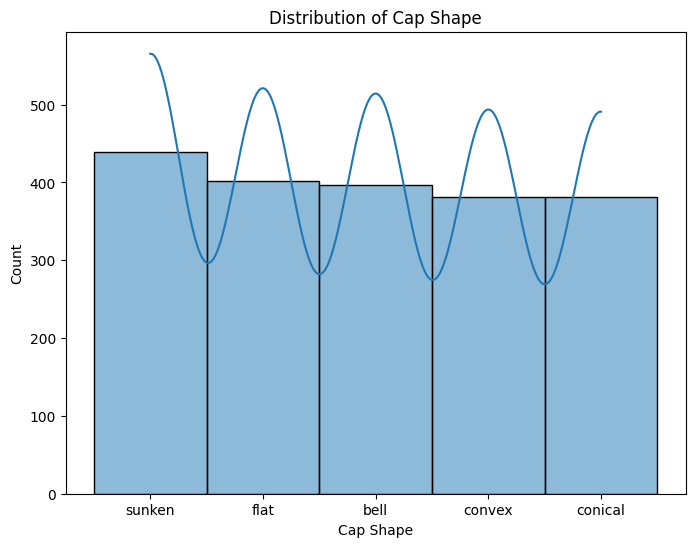

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data['cap_shape'], bins=10, kde=True)
plt.title('Distribution of Cap Shape')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.show()

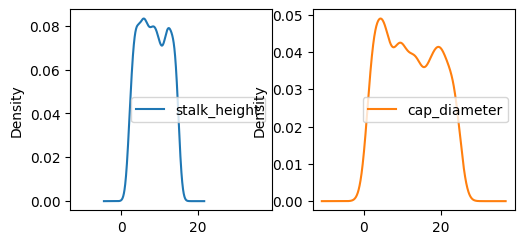

In [14]:
data.plot(kind='density', subplots=True, layout=(4,4), figsize=(12,12))
plt.show()

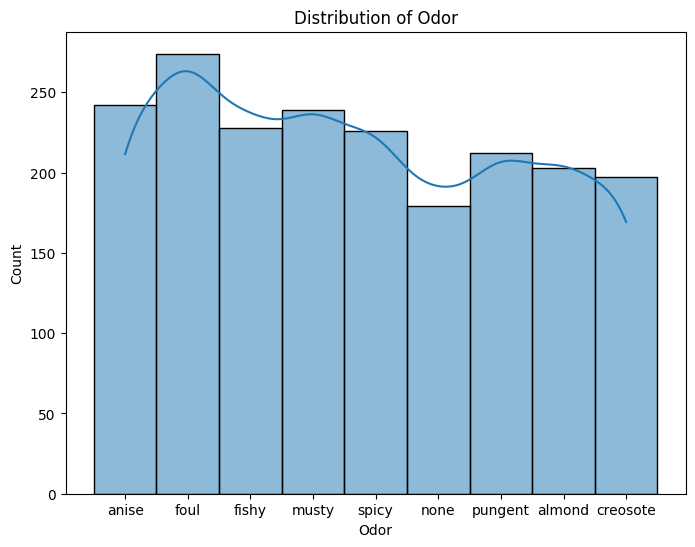

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data['odor'], bins=10, kde=True)
plt.title('Distribution of Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

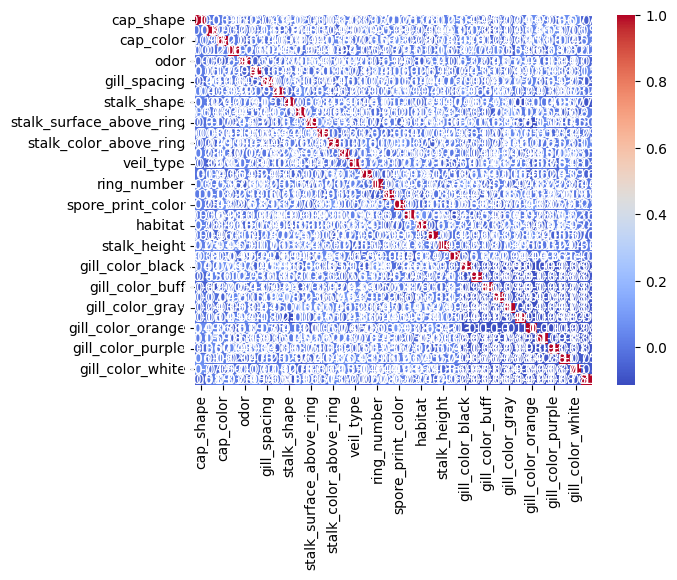

In [16]:
import seaborn as sns

for col in data.select_dtypes(include=['object']):
    if data[col].nunique() <= 10:
        data[col] = pd.Categorical(data[col]).codes

data = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns)
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Task 2: Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype == object:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [18]:
lab_enc=LabelEncoder()
for column in data.columns:
    data[column] = lab_enc.fit_transform(data[column])

In [19]:
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,stalk_shape,stalk_root,...,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow
0,4,2,7,0,1,1,2,0,1,2,...,0,0,0,0,0,1,0,0,0,0
1,4,0,6,0,1,3,1,1,0,6,...,0,1,0,0,0,0,0,0,0,0
2,3,1,5,1,4,1,1,0,1,2,...,0,0,0,0,0,0,1,0,0,0
3,0,2,4,1,3,3,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,3,3,8,1,5,2,1,1,0,4,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1996,4,2,5,1,5,0,2,1,1,5,...,0,0,0,0,0,0,0,1,0,0
1997,2,1,3,1,3,3,0,1,1,4,...,0,0,0,0,0,1,0,0,0,0
1998,0,3,7,0,7,2,0,1,0,6,...,0,0,0,0,1,0,0,0,0,0


In [20]:
lab_enc.classes_

array([False,  True])

In [21]:
target=data[['class']]
target

,class
0,1
1,0
2,1
3,1
4,1
...,...
1995,1
1996,1
1997,1
1998,1


In [22]:
features=data.drop('class',axis=1)
features

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,stalk_shape,stalk_root,...,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow
0,4,2,7,0,1,1,2,0,1,2,...,0,0,0,0,0,1,0,0,0,0
1,4,0,6,0,1,3,1,1,0,6,...,0,1,0,0,0,0,0,0,0,0
2,3,1,5,1,4,1,1,0,1,2,...,0,0,0,0,0,0,1,0,0,0
3,0,2,4,1,3,3,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,3,3,8,1,5,2,1,1,0,4,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1996,4,2,5,1,5,0,2,1,1,5,...,0,0,0,0,0,0,0,1,0,0
1997,2,1,3,1,3,3,0,1,1,4,...,0,0,0,0,0,1,0,0,0,0
1998,0,3,7,0,7,2,0,1,0,6,...,0,0,0,0,1,0,0,0,0,0


In [23]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 35)
(500, 35)
(1500, 1)
(500, 1)


In [25]:
svc=SVC(C=2.0,kernel='rbf',gamma=0.1)

In [26]:
svc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2.0, gamma=0.1)

In [27]:
y_pred= svc.predict(x_test)

In [28]:
accuracy_score(y_test,y_pred)

0.86

In [29]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.59      0.74       171\n           1       0.82      1.00      0.90       329\n\n    accuracy                           0.86       500\n   macro avg       0.91      0.80      0.82       500\nweighted avg       0.88      0.86      0.85       500\n'

In [30]:
confusion_matrix(y_test, y_pred)

array([[101,  70],
       [  0, 329]])

In [31]:
precision_score(y_test,y_pred)

0.8245614035087719

In [32]:
recall_score(y_test,y_pred)

1.0

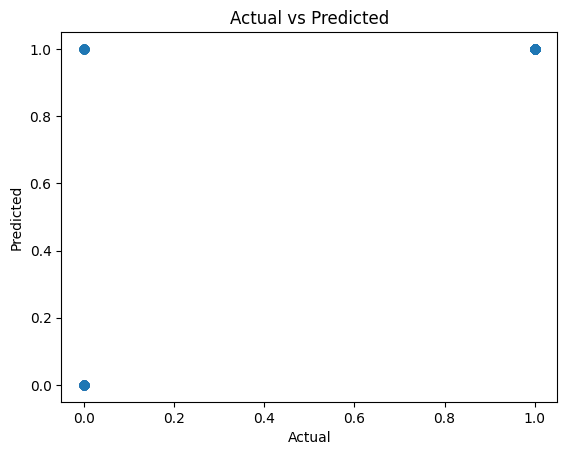

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

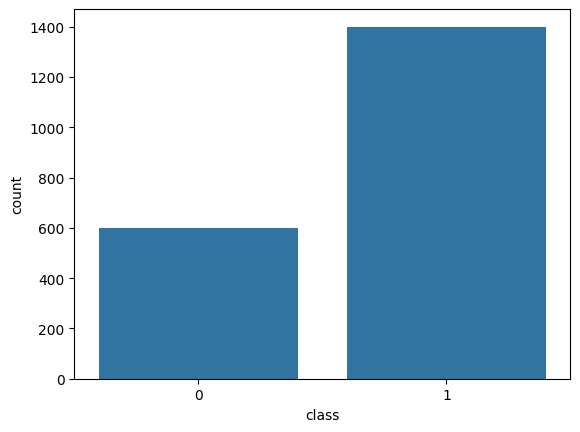

In [34]:
sns.countplot(x='class', data=data)
plt.show()